In [16]:

import pandas as pd

In [17]:
df = pd.read_csv('Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
df.isna().sum().sum()

np.int64(0)

/var/folders/kq/zdst5kxx4x39_9w4n35yjf_w0000gn/T/ipykernel_23229/2576888627.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='type',palette='viridis',order=df["type"].value_counts().index)


<Axes: xlabel='type', ylabel='count'>

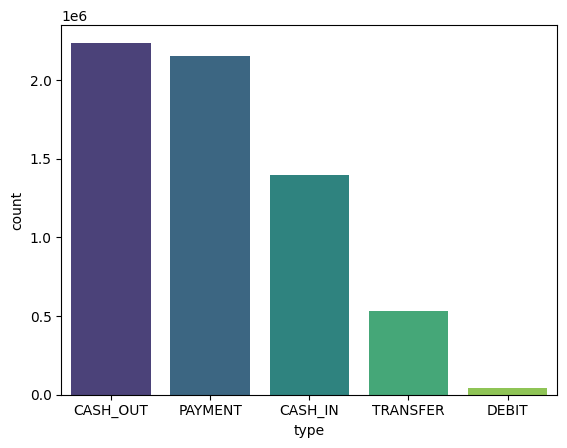

In [21]:
import seaborn as sns
df['type'].value_counts().sort_values(ascending=False)
sns.countplot(data=df,x='type',palette='viridis',order=df["type"].value_counts().index)

In [22]:
print(df['isFraud'].value_counts())
print(df['isFraud'].value_counts(normalize=True))  # gives percentages


isFraud
0    6354407
1       8213
Name: count, dtype: int64
isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


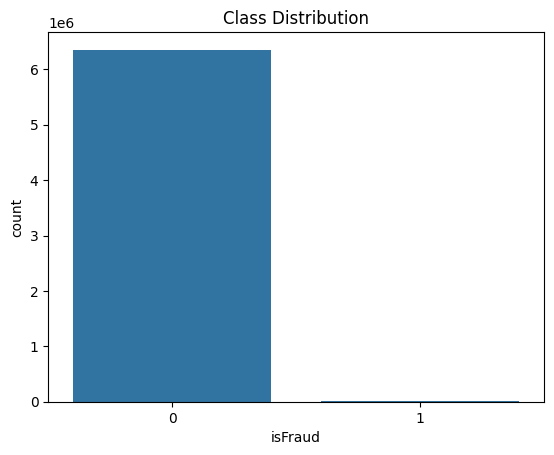

In [23]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='isFraud', data=df)
plt.title('Class Distribution')
plt.show()


In [24]:
!pip install imblearn

In [25]:
df = df.drop(['nameOrig','nameDest',"isFlaggedFraud"],axis=1)

In [26]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [27]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['type']=label_encoder.fit_transform(df['type'])

In [29]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
dtypes: float64(5), int64(3)
memory usage: 388.3 MB


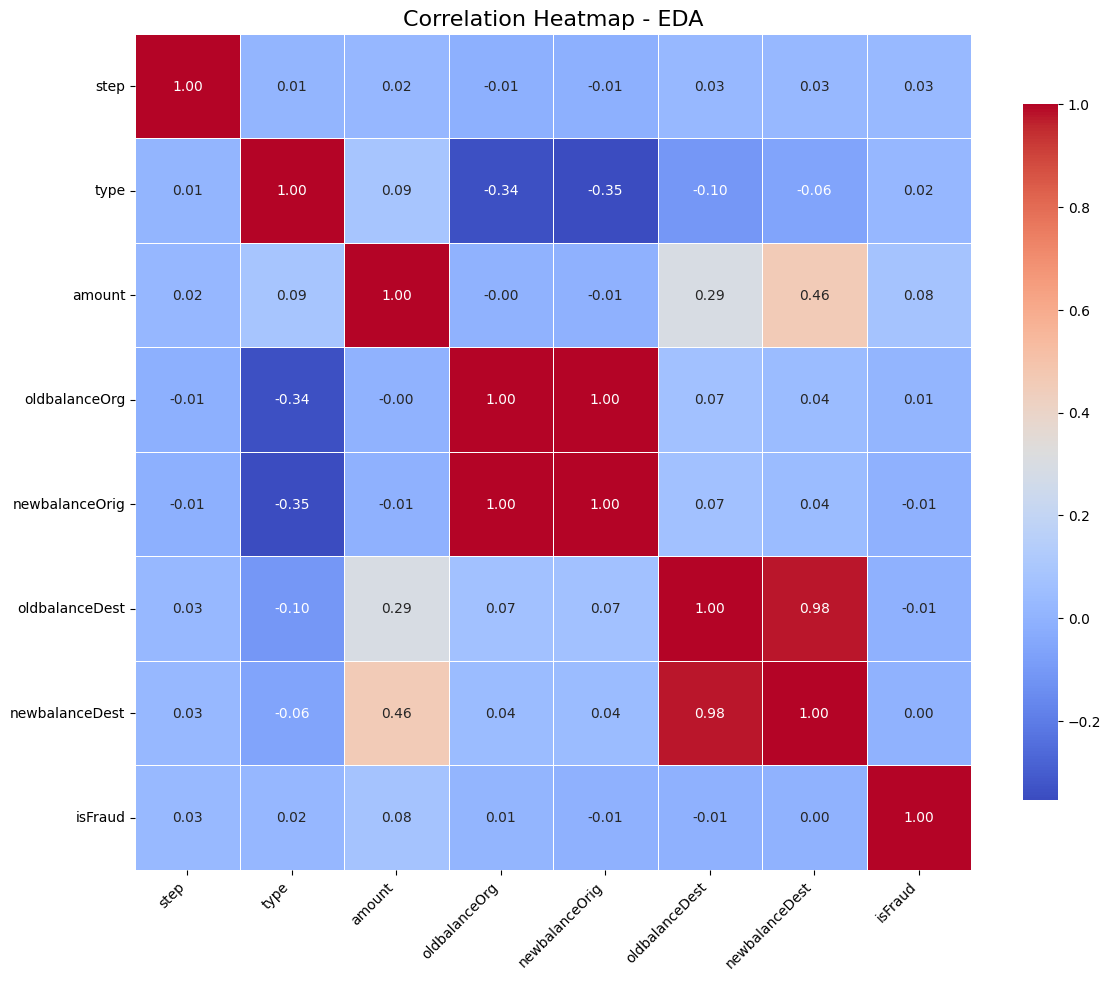

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Compute correlation matrix (numerical columns only)
corr_matrix = df.corr()

# Step 2: Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            linewidths=0.5, 
            square=True, 
            cbar_kws={'shrink': 0.8})

plt.title("Correlation Heatmap - EDA", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [32]:
!pip install imblearn 


In [33]:
from imblearn.over_sampling import SMOTE
X = df.drop("isFraud", axis=1)
y = df["isFraud"]
smote = SMOTE(random_state=42)

# Applying SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)


In [34]:
# Reconstruct the DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.Series(y_resampled, name="isFraud")

# Combine X and y
balanced_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)


In [35]:
print(balanced_df['isFraud'].value_counts())
print(balanced_df['isFraud'].value_counts(normalize=True))  # gives percentages

isFraud
0    6354407
1    6354407
Name: count, dtype: int64
isFraud
0    0.5
1    0.5
Name: proportion, dtype: float64


In [36]:
balanced_df.to_csv("balanced_dataset.csv", index=False)
